In [1]:
# Imports
import networkx as nx
import numpy as np
import matplotlib.pylab as plt

import os
import pickle

from abc import ABC
from abc import abstractmethod
import networkx as nx
import numpy as np
import random



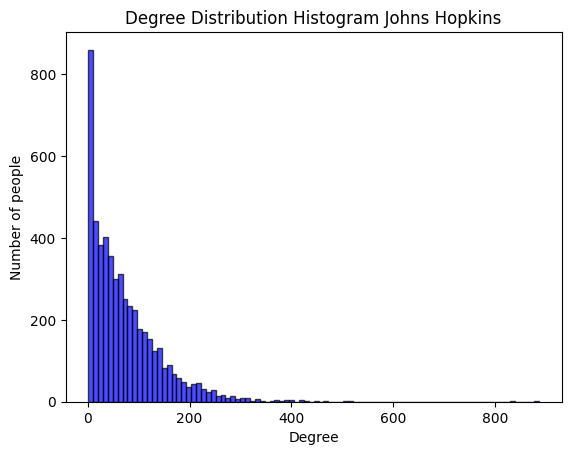

In [2]:
# Question 2.a
# Plotting the degree distribution of 3 networks : Caltech, MIT and Johns Hopkins

GCaltech = nx.read_gml("../data/Caltech36.gml")
GMIT = nx.read_gml("../data/MIT8.gml")

GHopkins = nx.read_gml("../data/Johns Hopkins55.gml")

""" print(len(GCaltech.nodes()))
print(len(GMIT.nodes()))
print(len(GHopkins.nodes()))
 """

def plotDegreeDistribution(G):
    """ degree = [v for k,v in dict(G.degree()).items()]
    distribution = [(elem, degree.count(elem)) for elem in sorted(set(degree))]
    k,pk = zip(*distribution)
    PDF = np.array(pk)/sum(pk)
    CCDF = 1-np.cumsum(PDF) 

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16/2,9/2))
    ax1.loglog(k, PDF, 'ro')
    ax1.set_xlabel("$k$ Degree")
    ax1.set_ylabel("$P_k$")
    ax1.set_title("PDF")

    ax2.loglog(k, CCDF, 'ro')
    ax2.set_ylim(1e-4,1.1)
    ax2.set_xlim(1,2e3)
    ax2.set_xlabel("$k$ Degree")
    ax2.set_ylabel("$1-P[K > k]$")
    ax2.set_title("CCDF")
    fig.tight_layout() """
    degrees = dict(G.degree())
    degree_values = list(degrees.values())

    # Plot the histogram
    plt.hist(degree_values, bins='auto', alpha=0.7, color='b', edgecolor='black')
    plt.title("Degree Distribution Histogram Johns Hopkins")
    plt.xlabel("Degree")
    plt.ylabel("Number of people")
    plt.savefig("../Q2/degree_distribution_Hopkins")
    plt.show()

plotDegreeDistribution(GHopkins)


In [3]:
# Question 2.b
# Compute global clustering coefficient and mean local clustering coefficient
# Compute the edge density

clusteringCoeffCaltech = nx.average_clustering(GCaltech)
clusteringCoeffMIT = nx.average_clustering(GMIT)
clusteringCoeffHopkins = nx.average_clustering(GHopkins)

print("clustering coef Caltech : ", clusteringCoeffCaltech)
print("clustering coef MIT : ",     clusteringCoeffMIT)
print("clustering coef Hopkins : ", clusteringCoeffHopkins)

densityCaltech = nx.density(GCaltech)
densityMIT = nx.density(GMIT)
densityHopkins = nx.density(GHopkins)

print("Density Caltech : ", densityCaltech)
print("Density MIT : ",     densityMIT)
print("Density Hopkins : ", densityHopkins)


# Density very low -> one person taken randomly in this graph has very low probability of knowing a lot of people
# Clustering coef relatively low -> in majority, people don't form perfect cluster (The people I know usually don't know all the people I know. This coef is between 0.2 and 0.4 which is not terrible after all : represents well real life friends group)


clustering coef Caltech :  0.40929439048517247
clustering coef MIT :  0.2712187419501315
clustering coef Hopkins :  0.26839307371293525
Density Caltech :  0.05640442132639792
Density MIT :  0.012118119495041378
Density Hopkins :  0.013910200162372396


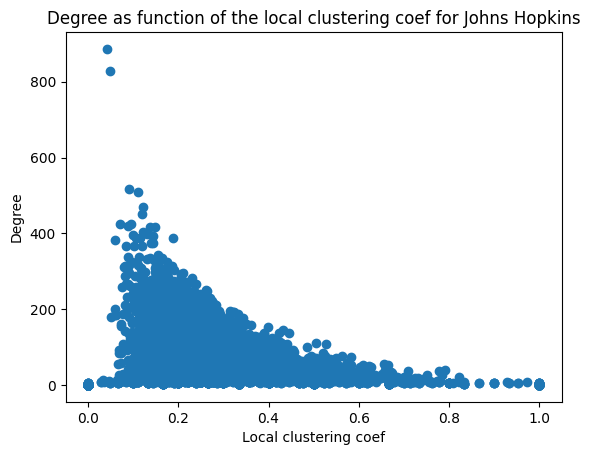

In [4]:
# Question 2.c
# Plot the scatter plot of the degree in regards to the local clustering coef


def plotDegreeLocalClustering(G):
    clustering = nx.clustering(G)
    clusteringCoefs = list(clustering.values())
    
    degrees = dict(G.degree())
    degree_values = list(degrees.values())

    plt.scatter(clusteringCoefs, degree_values, marker = "o")
    plt.ylabel("Degree")
    plt.xlabel("Local clustering coef")
    plt.title("Degree as function of the local clustering coef for Johns Hopkins")
    plt.savefig("../Q2/degree_function_local_clustering_Hopkins")
#plotDegreeLocalClustering(GCaltech)
plotDegreeLocalClustering(GHopkins)
#plotDegreeLocalClustering(GHopkins)

# The higher the degree is, the less likely the person is to be part of a local cluster. Those ppl can be faculty members, professors, staff, board members etc. They know a lot of ppl (high degree) but ofc all the ppl they know usually don't know each other
# Only ppl with a low degree can achieve a local high local cluster coefficient : in universities, ther are for example small group of friends that are very bounded and do not know a lot of other ppl.
# At a low degree, ppl can have any local clustering coeff : some ppl don't have a close group of friends and still don't know a lot of people. 


In [5]:
# Question 3.a
# Assortativity
""" print("Assortativity student fac")
print("Gcaltech", nx.attribute_assortativity_coefficient(GCaltech, "student_fac"))
print("GMIT", nx.attribute_assortativity_coefficient(GMIT, "student_fac"))
print("GHopkins", nx.attribute_assortativity_coefficient(GHopkins, "student_fac"))

print("\n\nAssortativity major")
print("Gcaltech", nx.attribute_assortativity_coefficient(GCaltech, "major_index"))
print("GMIT", nx.attribute_assortativity_coefficient(GMIT, "major_index"))
print("GHopkins", nx.attribute_assortativity_coefficient(GHopkins, "major_index"))

print("\n\nAssortativity vertex degree")
print("Gcaltech", nx.degree_assortativity_coefficient(GCaltech))
print("GMIT", nx.degree_assortativity_coefficient(GMIT))
print("GHopkins", nx.degree_assortativity_coefficient(GHopkins))

print("\n\nAssortativity dorm")
print("Gcaltech", nx.attribute_assortativity_coefficient(GCaltech, "dorm"))
print("GMIT", nx.attribute_assortativity_coefficient(GMIT, "dorm"))
print("GHopkins", nx.attribute_assortativity_coefficient(GHopkins, "dorm"))

print("\n\nAssortativity gender")
print("Gcaltech", nx.attribute_assortativity_coefficient(GCaltech, "gender"))
print("GMIT", nx.attribute_assortativity_coefficient(GMIT, "gender"))
print("GHopkins", nx.attribute_assortativity_coefficient(GHopkins, "gender"))
 """
# On all graphs !

def get_graphs_tab():

    # LOAD GRAPHS VARIABLE IF SAVED
    if os.path.exists('../Q3/graphs.pkl'):
        with open('../Q3/graphs.pkl', 'rb') as f:
            graphs = pickle.load(f)
            directory = "../data/"
            files = os.listdir(directory)
            size_graphs = [len(graph.nodes()) for graph in graphs]
            file_names = [file for file in files if os.path.isfile(os.path.join(directory, file))]


    # COMPUTE IF NO EXISTING GRAPHS
    else :  
        size_graphs = []
        graphs = []
        directory = "../data/"
        files = os.listdir(directory)
        file_names = [file for file in files if os.path.isfile(os.path.join(directory, file))]

        iter = 0
        for file_name in file_names:
            
            #if(iter < 5):
            graph = nx.read_gml(directory + file_name)
            graphs.append(graph)
            size_graphs.append(len(graph.nodes()))
            iter+=1

        # SAVE GRAPHS VARIABLE
        with open('../Q3/graphs.pkl', 'wb') as f:
            pickle.dump(graphs, f)

    print(nx.degree_assortativity_coefficient(graphs[0]))
    print("number of graphs: ", len(file_names))
    return graphs, size_graphs


student_fac_assortativity = []
major_assortativity = []
degree_assortativity = []
dorm_assortativity = []
gender_assortativity = []

def compute_assortativity_graphs():
    for graph in graphs:
        student_fac_assortativity.append(nx.attribute_assortativity_coefficient(graph, "student_fac"))
        major_assortativity.append(nx.attribute_assortativity_coefficient(graph, "major_index"))
        degree_assortativity.append(nx.degree_assortativity_coefficient(graph))
        dorm_assortativity.append(nx.attribute_assortativity_coefficient(graph, "dorm"))
        gender_assortativity.append(nx.attribute_assortativity_coefficient(graph, "gender"))
    

def get_mean_assortativites():
    print("Mean assortativity : ")
    print("Dorm : ", np.average(dorm_assortativity))
    print("Student_fac : ", np.average(student_fac_assortativity))
    print("Major : ", np.average(major_assortativity))
    print("Degree : ", np.average(degree_assortativity))
    print("Gender : ", np.average(gender_assortativity))


graphs, size_graphs = get_graphs_tab()
compute_assortativity_graphs()
get_mean_assortativites()




0.056204574545371214
number of graphs:  100
Mean assortativity : 
Dorm :  0.17510582858175655
Student_fac :  0.32273815859121513
Major :  0.051114943318787784
Degree :  0.06264795282554285
Gender :  0.04295811084803952


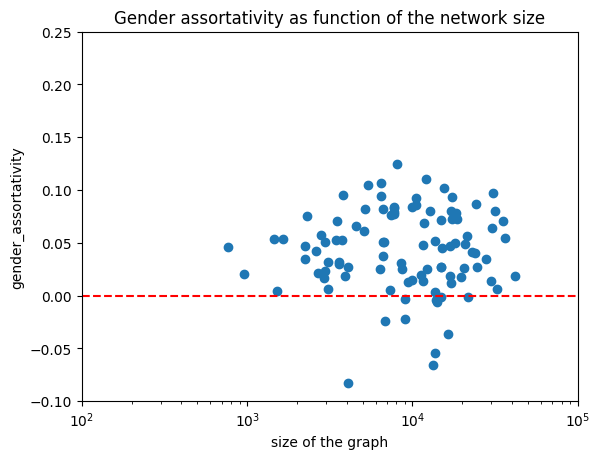

In [6]:
## SCATTER PLOTS
""" plt.ylabel("student_fac_assortativity")
plt.xlabel("size of the graph")
plt.title('Student_fac assortativity as function of the network size')
plt.xscale('log')
plt.xlim(10**2, 10**5)
plt.ylim(0, 0.7)
plt.scatter(size_graphs, student_fac_assortativity) 
plt.savefig('../Q3/scatter_student_fac_assortativity') """

""" 
plt.ylabel("major_assortativity")
plt.xlabel("size of the graph")
plt.title('Major assortativity as function of the network size')
plt.xscale('log')
plt.xlim(10**2, 10**5)
plt.ylim(0, 0.2)
plt.scatter(size_graphs, major_assortativity) 
plt.savefig('../Q3/scatter_major_assortativity')
"""

""" 
plt.ylabel("degree_assortativity")
plt.xlabel("size of the graph")
plt.title('Degree assortativity as function of the network size')
plt.xscale('log')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlim(10**2, 10**5)
plt.ylim(-0.2, 0.4)
plt.scatter(size_graphs, degree_assortativity) 
plt.savefig('../Q3/scatter_degree_assortativity') """



""" plt.ylabel("dorm_assortativity")
plt.xlabel("size of the graph")
plt.title('Dorm assortativity as function of the network size')
plt.xscale('log')
plt.xlim(10**2, 10**5)
plt.ylim(0, 0.5)
plt.scatter(size_graphs, dorm_assortativity) 
plt.savefig('../Q3/scatter_dorm_assortativity')
"""

plt.ylabel("gender_assortativity")
plt.xlabel("size of the graph")
plt.title('Gender assortativity as function of the network size')
plt.xscale('log')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlim(10**2, 10**5)
plt.ylim(-0.10, 0.25)
plt.scatter(size_graphs, gender_assortativity) 
plt.savefig('../Q3/scatter_gender_assortativity') 

 

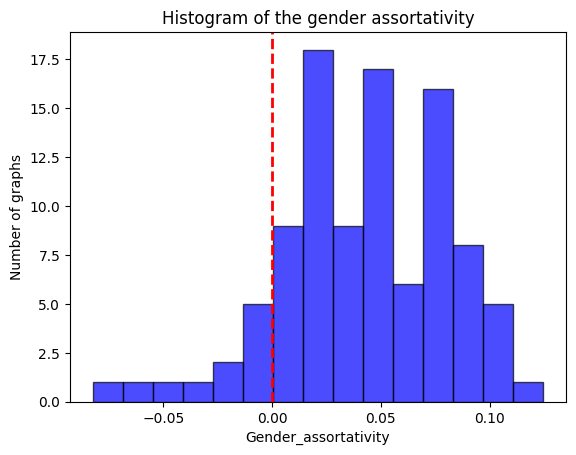

In [7]:
## HISTOGRAMS
""" plt.hist(student_fac_assortativity, bins=15, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Student_fac_assortativity')
plt.ylabel('Number of graphs')
plt.title('Histogram of the student_fac assortativity')
plt.savefig('../Q3/hist_student_fac_assortativity')
plt.show()
"""

""" 
plt.hist(dorm_assortativity, bins=15, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Dorm_assortativity')
plt.ylabel('Number of graphs')
plt.title('Histogram of the dorm assortativity')
plt.savefig('../Q3/hist_dorm_assortativity')
plt.show() 
"""

 
""" plt.hist(degree_assortativity, bins=15, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Degree_assortativity')
plt.ylabel('Number of graphs')
plt.title('Histogram of the degree assortativity')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
plt.savefig('../Q3/hist_degree_assortativity')
plt.show()  """

""" plt.hist(major_assortativity, bins=15, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('major_assortativity')
plt.ylabel('Number of graphs')
plt.title('Histogram of the major assortativity')
plt.savefig('../Q3/hist_major_assortativity')
plt.show() """



plt.hist(gender_assortativity, bins=15, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Gender_assortativity')
plt.ylabel('Number of graphs')
plt.title('Histogram of the gender assortativity')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
plt.savefig('../Q3/hist_gender_assortativity')
plt.show()
 

In [62]:
# Question 4
# Link prediction algorithm

# Question 4.b

class LinkPrediction (ABC) :
    def __init__ (self, graph) :
        """
        Constructor
            Parameters
            ----------
        graph : Networkx graph
        """
        self.graph = graph
        self.N = len (graph)

    def neighbors ( self , v ) :
        """  Return the neighbors list of a node
            Parameters
            ----------
            v : int (node id)

            Return
            ------
            neighbors_list : python list 
        """
        neighbors_list = self.graph.neighbors(v)
        return list(neighbors_list)
    
    @abstractmethod
    def __fit(self) :
        raise NotImplementedError(" Fit must be implemented ")
    

class CommonNeighbors (LinkPrediction):
    def __init__(self, graph):
        super(CommonNeighbors, self).__init__(graph)
    
    def _LinkPrediction__fit(self):
        self.scoresMatrixCN = np.zeros((self.N, self.N))
        # We go through every pair of nodes
        for u in range(1,self.N):
            for v in range(u+1, self.N): #so that we don't compute the same value twice and avoid same nodes value
                score=0
                for i in self.neighbors(str(u)):
                    for k in self.neighbors(str(v)):
                        if i == k:
                            score+=1
                            break # i is a common neighbor of u and v. Let's try with other neighbors 
                self.scoresMatrixCN[u][v] = score # Diagonal matrix to avoid same results twice

        

    

class Jaccard(LinkPrediction):
    def __init__(self, graph):
        super(Jaccard, self).__init__(graph)

    def _LinkPrediction__fit(self):
        self.scoresMatrixJac = np.zeros((self.N, self.N))
        for u in range(1,self.N):
            for v in range(u+1, self.N): 
                score=0
                neighborsUnion = list(set(self.neighbors(str(u)) + self.neighbors(str(v)))) # list(set(l1+l2)) to make union of 2 lists
                numberNeighborsUnion = len(neighborsUnion)
                if(numberNeighborsUnion != 0):
                    for i in self.neighbors(str(u)):
                        for k in self.neighbors(str(v)):
                            if i == k:
                                score+=1
                                break 
                    self.scoresMatrixJac[u][v] = score / numberNeighborsUnion
                else:
                    self.scoresMatrixJac[u][v] = 0
        

class AdamicAdar(LinkPrediction):
    def __init__(self, graph):
        super(AdamicAdar, self).__init__(graph)

    def _LinkPrediction__fit(self):
        self.scoresMatrixAdamicAdar = np.zeros((self.N, self.N))
        for u in range(1,self.N):
            for v in range(u+1, self.N): 
                score=0
                for i in self.neighbors(str(u)):
                    for k in self.neighbors(str(v)):
                        if i == k:
                            score+=1/np.log(len(self.neighbors(str(i))))
                            break 
                self.scoresMatrixAdamicAdar[u][v] = score 




In [85]:
# Question 4.c.1
# Question 4.c.2


fractions = [0.05, 0.1, 0.15, 0.2]

def remove_fraction_edges(graph, fraction):
    number_edges = len(list(graph.edges()))
    edges_to_remove = int(number_edges*fraction)
    #print("edges_to_remove = ", edges_to_remove)
    removed_edges= []
    while (len(list(graph.edges())) + edges_to_remove) > number_edges:
        to_remove = random.choice(list(graph.edges())) 
        removed_edges.append(to_remove)
        #print("to_remove = ", to_remove)
        #print("number_of_edges_current = ", len(list(graph.edges())))
        graph.remove_edges_from([to_remove])
    return graph, removed_edges

def preprocess_graph(graph, fraction_rm):
    #fraction_rm = random.choice(fractions)
    #print("fraction_rm = ", fraction_rm)
    #print("graph edges before : ", len(list(graph.edges())))
    graph_afterrm, graph_removed_edges = remove_fraction_edges(graph, fraction_rm)
    #print("return graph edges : ", len(list(graph_afterrm.edges())))
    #print(f"removed_edges_list from Caltech :  {graph_removed_edges}")
    return graph_afterrm, graph_removed_edges

In [86]:
# Question 4.c.3

# COMMON NEIGHBORS

def compute_common_neighbors(graph):
    cn = CommonNeighbors(graph)
    cn._LinkPrediction__fit()
    #np.set_printoptions(threshold=np.inf) ## MODIFY TO AVOID SHIT PRINT
    #print(cn.scoresMatrixCN)
    return(cn.scoresMatrixCN)


# JACCARD
    
def compute_jaccard(graph):
    jaccard = Jaccard(graph)
    jaccard._LinkPrediction__fit()
    #np.set_printoptions(threshold=np.inf) ## MODIFY TO AVOID SHIT PRINT
    #print(jaccard.scoresMatrixJac)
    return jaccard.scoresMatrixJac
 

# ADAMIC / ADAR
def compute_adamic_adar(graph):
    adamicAdar = AdamicAdar(graph)
    adamicAdar._LinkPrediction__fit()
    #np.set_printoptions(threshold=np.inf) ## MODIFY TO AVOID SHIT PRINT
    #print(adamicAdar.scoresMatrixAdamicAdar)
    return(adamicAdar.scoresMatrixAdamicAdar)





In [87]:
# Question 4.c.4

# COMMON NEIGHBORS 
def sort_common_neighbors(scoreMatrix, NumberNodes):
    list_common_neighbors_sorted_by_score = []
    for i in range(NumberNodes):
        for j in range(NumberNodes):
            if i != j:
                list_common_neighbors_sorted_by_score.append(((i,j), scoreMatrix[i][j]))
    list_common_neighbors_sorted_by_score.sort(key=lambda x: x[1], reverse=True) # we sort by the decreasing number of common neighbors
    #print(list_common_neighbors_sorted_by_score) 
    list_common_neighbors_sorted_without_score = [item[0] for item in list_common_neighbors_sorted_by_score]
    list_common_neighbors_sorted_without_score_str = [(str(item[0]), str(item[1])) for item in list_common_neighbors_sorted_without_score]
    return list_common_neighbors_sorted_without_score_str
 


# JACCARD 
def sort_jaccard(scoreMatrix, NumberNodes):
    list_jaccard_sorted_by_score = []
    for i in range(NumberNodes):
        for j in range(NumberNodes):
            if i != j:
                list_jaccard_sorted_by_score.append(((i,j), scoreMatrix[i][j]))
    list_jaccard_sorted_by_score.sort(key=lambda x: x[1], reverse=True) # we sort by the decreasing number of common neighbors
    #print(list_jaccard_sorted_by_score)
    list_jaccard_sorted_without_score = [item[0] for item in list_jaccard_sorted_by_score]
    list_jaccard_sorted_without_score_str = [(str(item[0]), str(item[1])) for item in list_jaccard_sorted_without_score]
    return list_jaccard_sorted_without_score_str
 
# ADAMIC / ADAR

def sort_adamic_adar(scoreMatrix, NumberNodes):
    list_adamicadar_sorted_by_score = []
    for i in range(NumberNodes):
        for j in range(NumberNodes):
            if i != j:
                list_adamicadar_sorted_by_score.append(((i,j), scoreMatrix[i][j]))
    list_adamicadar_sorted_by_score.sort(key=lambda x: x[1], reverse=True) # we sort by the decreasing number of common neighbors
    """  print(list_adamicadar_sorted_by_score)
    print(list_adamicadar_sorted_by_score[:12]) """
    list_adamicadar_sorted_without_score = [item[0] for item in list_adamicadar_sorted_by_score]
    list_adamicadar_sorted_without_score_str = [(str(item[0]), str(item[1])) for item in list_adamicadar_sorted_without_score]
    return list_adamicadar_sorted_without_score_str
    """ print(list_adamicadar_sorted_without_score[:12])
    print(list_adamicadar_sorted_without_score_str[:12]) """






In [89]:
# Question 4.c.5

import networkx as nx
from sklearn.metrics import precision_score, recall_score

def compute_metrics(removed_edges, predicted_edges, k):
    removed_edges_set = set(removed_edges)
    predicted_edges_set = set(predicted_edges[:k])

    # True Positives
    tp = len(removed_edges_set.intersection(predicted_edges_set))
    #print(f"tp:  {tp}")
    # False Positives
    fp = len(predicted_edges_set - removed_edges_set)
    #print(f"fp:  {fp}")

    # False Negatives
    fn = len(removed_edges_set - predicted_edges_set)
    #print(f"fn:  {fn}")

    # Precision
    precision_k = tp / (tp + fp) if tp + fp > 0 else 0.0

    # Recall
    recall_k = tp / (tp + fn) if tp + fn > 0 else 0.0

    return precision_k, recall_k




In [98]:
# All-in-one function to aggregate code

def evaluate_graph_link_prediction(graph, f):
    graph_afterrm, graph_removed_edges = preprocess_graph(graph, f)

    precision_cn = []
    recall_cn = []

    precision_jaccard = []
    recall_jaccard = []

    precision_aa = []
    recall_aa = []

    matrix_cn = compute_common_neighbors(graph_afterrm)
    list_sorted_cn = sort_common_neighbors(matrix_cn, len(graph.nodes()))

    matrix_jaccard = compute_jaccard(graph_afterrm)
    list_sorted_jaccard = sort_jaccard(matrix_jaccard, len(graph.nodes()))

    matrix_aa = compute_adamic_adar(graph_afterrm)
    list_sorted_aa = sort_adamic_adar(matrix_aa, len(graph.nodes()))

    
    for k in [50, 100, 200, 400]:

        precision_k, recall_k = compute_metrics(graph_removed_edges, list_sorted_cn, k)
        print("Common Neighbors : ")
        print(f"Precision@k={k}@f={f}: {precision_k}")
        print(f"Recall@k={k}@f={f}: {recall_k}")
        precision_cn.append(precision_k)
        recall_cn.append(recall_k)

        precision_k, recall_k = compute_metrics(graph_removed_edges, list_sorted_jaccard, k)
        print("Jaccard : ")
        print(f"Precision@k={k}@f={f}: {precision_k}")
        print(f"Recall@k={k}@f={f}: {recall_k}")
        precision_jaccard.append(precision_k)
        recall_jaccard.append(recall_k)  

        precision_k, recall_k = compute_metrics(graph_removed_edges, list_sorted_aa, k)
        print("Adamic Adar : ")
        print(f"Precision@k={k}@f={f}: {precision_k}")
        print(f"Recall@k={k}@f={f}: {recall_k}")
        precision_aa.append(precision_k)
        recall_aa.append(recall_k)

        
    return precision_cn, recall_cn, precision_jaccard, recall_jaccard, precision_aa, recall_aa


In [105]:

########## for Caltech36 ##########
GCaltech = nx.read_gml("../data/Caltech36.gml")

# f = 0.05 #

precision_cn_005, recall_cn_005, precision_jaccard_005, recall_jaccard_005, precision_aa_005, recall_aa_005 = evaluate_graph_link_prediction(GCaltech, 0.05)

# f = 0.1 #

precision_cn_01, recall_cn_01, precision_jaccard_01, recall_jaccard_01, precision_aa_01, recall_aa_01 = evaluate_graph_link_prediction(GCaltech, 0.1)

# f = 0.15 #

precision_cn_015, recall_cn_015, precision_jaccard_015, recall_jaccard_015, precision_aa_015, recall_aa_015 = evaluate_graph_link_prediction(GCaltech, 0.15)

# f = 0.2 #

precision_cn_02, recall_cn_02, precision_jaccard_02, recall_jaccard_02, precision_aa_02, recall_aa_02 = evaluate_graph_link_prediction(GCaltech, 0.2)



Common Neighbors : 
Precision@k=50@f=0.05: 0.02
Recall@k=50@f=0.05: 0.001201923076923077
Jaccard : 
Precision@k=50@f=0.05: 0.08
Recall@k=50@f=0.05: 0.004807692307692308
Adamic Adar : 
Precision@k=50@f=0.05: 0.02
Recall@k=50@f=0.05: 0.001201923076923077
Common Neighbors : 
Precision@k=100@f=0.05: 0.03
Recall@k=100@f=0.05: 0.003605769230769231
Jaccard : 
Precision@k=100@f=0.05: 0.13
Recall@k=100@f=0.05: 0.015625
Adamic Adar : 
Precision@k=100@f=0.05: 0.03
Recall@k=100@f=0.05: 0.003605769230769231
Common Neighbors : 
Precision@k=200@f=0.05: 0.05
Recall@k=200@f=0.05: 0.01201923076923077
Jaccard : 
Precision@k=200@f=0.05: 0.125
Recall@k=200@f=0.05: 0.030048076923076924
Adamic Adar : 
Precision@k=200@f=0.05: 0.05
Recall@k=200@f=0.05: 0.01201923076923077
Common Neighbors : 
Precision@k=400@f=0.05: 0.0475
Recall@k=400@f=0.05: 0.02283653846153846
Jaccard : 
Precision@k=400@f=0.05: 0.09
Recall@k=400@f=0.05: 0.04326923076923077
Adamic Adar : 
Precision@k=400@f=0.05: 0.05
Recall@k=400@f=0.05: 0.02

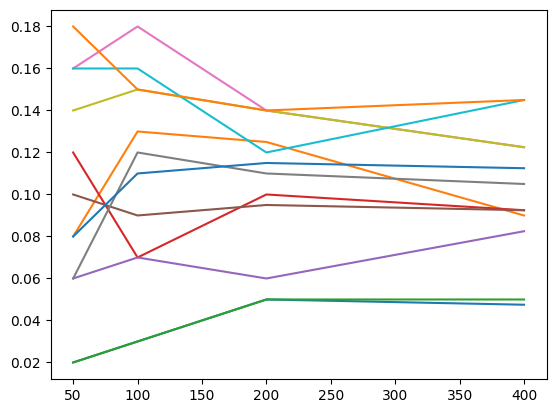

In [107]:

# Precision graph for CN

# Precision graph for Jaccard

# Precision graph for Adamic Adar


k = [50, 100, 200, 400]

plt.plot(k, precision_cn_005)
plt.plot(k, precision_jaccard_005)
plt.plot(k, precision_aa_005)

plt.plot(k, precision_cn_01)
plt.plot(k, precision_jaccard_01)
plt.plot(k, precision_aa_01)

plt.plot(k, precision_cn_015)
plt.plot(k, precision_jaccard_015)
plt.plot(k, precision_aa_015)

plt.plot(k, precision_cn_02)
plt.plot(k, precision_jaccard_02)
plt.plot(k, precision_aa_02)

plt.show()